# Testing The Data Generator From Directory

I borrowed ("overloaded") from the Image Data Generator class to get the functionality I needed for my data pipeline. Our data can be organized as a single huge image file that stores all the tensors, or it can be many datasets that have been analyzed and converted into their sequence of images (FFT, fragility, etc). 

For Image learning: For each batch, we want to randomly sample filepaths and from each file, we want to randomly sample an image. 

For sequence Learning (**To Do**): We can modify the above approach to randomly sample filepaths and from each file, we randomly sample a sequence that we need. Say for each dataset we want a sequence of 30 samples if we have a memory of 10-20. 

Resources
- https://stackoverflow.com/questions/45797852/keras-visualize-imagedatagenerator-output


In [3]:
import sys
# sys.path.append('../')
sys.path.append('../dnn/')
# sys.path.append('/Users/adam2392/Documents/fragility_analysis/')
# import fragility.util.utils as futil

import os
import time
import pickle
import numpy as np
import pandas as pd
import scipy
import scipy.io

import processing
import processing.generators.genimagefromfile

from natsort import natsorted
import ntpath
import keras

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail or ntpath.basename(head)

/Users/adam2392/Documents/dnn-unsupervised/.venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
imagegen = processing.generators.generatorfromfile.DataDirGenerator(
                    featurewise_center=False,  # set input mean to 0 over the dataset
                    samplewise_center=True,  # set each sample mean to 0
                    featurewise_std_normalization=False,  # divide inputs by std of the dataset
                    samplewise_std_normalization=True,  # divide each input by its std
                    rotation_range=5,         # randomly rotate images in the range (degrees, 0 to 180)
                    width_shift_range=0.02,    # randomly shift images horizontally (fraction of total width)
                    height_shift_range=0.02,   # randomly shift images vertically (fraction of total height)
                    horizontal_flip=False,    # randomly flip images
                    vertical_flip=False,      # randomly flip images
                    shear_range=0.,
                    zoom_range=0.,
                    channel_shift_range=0.,
                    fill_mode='nearest')  

In [5]:
traindir = '/Volumes/ADAM LI/pydata/dnn/traindata_fft/tvbsims/'
batches = imagegen.flow_from_directory(traindir,
                                      batch_size=32,
                                      num_classes=2,
                                       numchannels=4,
                                       imsize=32,
                                      shuffle=True,
                                      interpolation='nearest')
x_batch, y_batch = next(batches)

Found 248 image files.


In [6]:
print(x_batch.shape)

(32, 32, 32, 4)


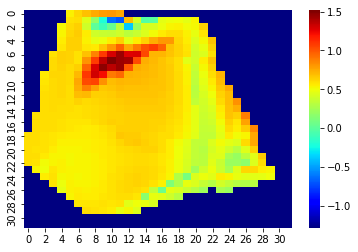

In [7]:
sns.heatmap(x_batch[0,:,:,0], cmap='jet')

# Test Data Generator For Sequences

In [ ]:
imagegen = processing.generators.generatorfromfile.DataDirGenerator(
                    featurewise_center=False,  # set input mean to 0 over the dataset
                    samplewise_center=True,  # set each sample mean to 0
                    featurewise_std_normalization=False,  # divide inputs by std of the dataset
                    samplewise_std_normalization=True,  # divide each input by its std
                    rotation_range=5,         # randomly rotate images in the range (degrees, 0 to 180)
                    width_shift_range=0.02,    # randomly shift images horizontally (fraction of total width)
                    height_shift_range=0.02,   # randomly shift images vertically (fraction of total height)
                    horizontal_flip=False,    # randomly flip images
                    vertical_flip=False,      # randomly flip images
                    shear_range=0.,
                    zoom_range=0.,
                    channel_shift_range=0.,
                    fill_mode='nearest')  

traindir = '/Volumes/ADAM LI/pydata/dnn/traindata_fft/tvbsims/'
batches = imagegen.flow_from_directory(traindir,
                                      batch_size=32,
                                      num_classes=2,
                                       numchannels=4,
                                       imsize=32,
                                      shuffle=True,
                                      interpolation='nearest')
x_batch, y_batch = next(batches)

print(x_batch.shape)